## 1. Loading friend's data into a dictionary
<p><img src="https://assets.datacamp.com/production/project_1237/img/netflix.jpg" alt="Someone's feet on table facing a television"></p>
<p>Netflix! What started in 1997 as a DVD rental service has since exploded into the largest entertainment/media company by <a href="https://www.marketwatch.com/story/netflix-shares-close-up-8-for-yet-another-record-high-2020-07-10">market capitalization</a>, boasting over 200 million subscribers as of <a href="https://www.cbsnews.com/news/netflix-tops-200-million-subscribers-but-faces-growing-challenge-from-disney-plus/">January 2021</a>.</p>
<p> For the years from 2011 to 2020, the average movie durations are 103, 101, 99, 100, 100, 95, 95, 96, 93, and 90, respectively.</p>
<p>If we're going to be working with this data, we know a good place to start would be to probably start working with <code>pandas</code>. But first we'll need to create a DataFrame from scratch. Let's start by creating a Python object covered in <a>

In [ ]:

years = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]
movie_dict = {"years":years,
              "durations":durations,}
print(movie_dict)

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}


## 2. Creating a DataFrame from a dictionary

In [ ]:
import pandas as pd
durations_df = pd.DataFrame(movie_dict)
print(durations_df)

   years  durations
0   2011        103
1   2012        101
2   2013         99
3   2014        100
4   2015        100
5   2016         95
6   2017         95
7   2018         96
8   2019         93
9   2020         90


## 3. A visual inspection of our data

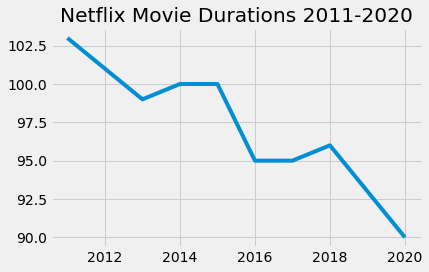

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()

x=durations_df['years']
y=durations_df['durations']
plt.plot(x,y)

plt.title( "Netflix Movie Durations 2011-2020")
plt.show()


## 4. Loading the rest of the data from a CSV

In [ ]:
netflix_df = pd.read_csv("datasets/netflix_data.csv")
print(netflix_df[0:5])

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year  duration  \
0    August 14, 2020          2020         4   
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009        80   
4    January 1, 2020          2008       123

## 5. Filtering for movies!

In [ ]:
netflix_df_movies_only = netflix_df[netflix_df['type']=='Movie']
netflix_movies_col_subset = netflix_df_movies_only[['title', 'country', 'genre', 'release_year', 'duration']]
netflix_movies_col_subset[0:5]

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


## 6. Creating a scatter plot

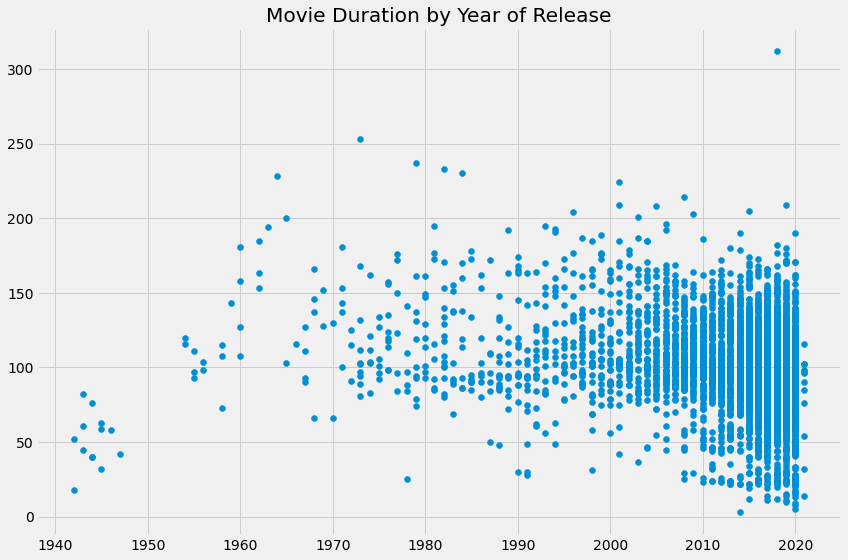

In [ ]:
fig = plt.figure(figsize=(12,8))
x=netflix_movies_col_subset['release_year']
y=netflix_movies_col_subset['duration']
plt.title("Movie Duration by Year of Release")
plt.scatter(x,y)
plt.show()

## 7. Digging deeper

In [ ]:
short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration']<60]
print(short_movies[0:20])

                                                 title         country  \
35                                           #Rucker50   United States   
55                 100 Things to do Before High School   United States   
67   13TH: A Conversation with Oprah Winfrey & Ava ...             NaN   
101                                  3 Seconds Divorce          Canada   
146                                     A 3 Minute Hug          Mexico   
162  A Christmas Special: Miraculous: Tales of Lady...          France   
171                         A Family Reunion Christmas   United States   
177                    A Go! Go! Cory Carson Christmas   United States   
178                    A Go! Go! Cory Carson Halloween             NaN   
179                  A Go! Go! Cory Carson Summer Camp             NaN   
181             A Grand Night In: The Story of Aardman  United Kingdom   
200                            A Love Song for Latasha   United States   
220                         A Russell 

## 8. Marking non-feature films

In [ ]:
colors = []
for lab, row in netflix_movies_col_subset.iterrows() :
    if row["genre"]=="Children" :
        colors.append("red")
    elif row["genre"]=="Documentaries" :
        colors.append("blue")
    elif row["genre"]=="Stand-Up" :
         colors.append("green")
    else:
         colors.append("black")
           
print(colors[0:10])

['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue']


9. Plotting with color!

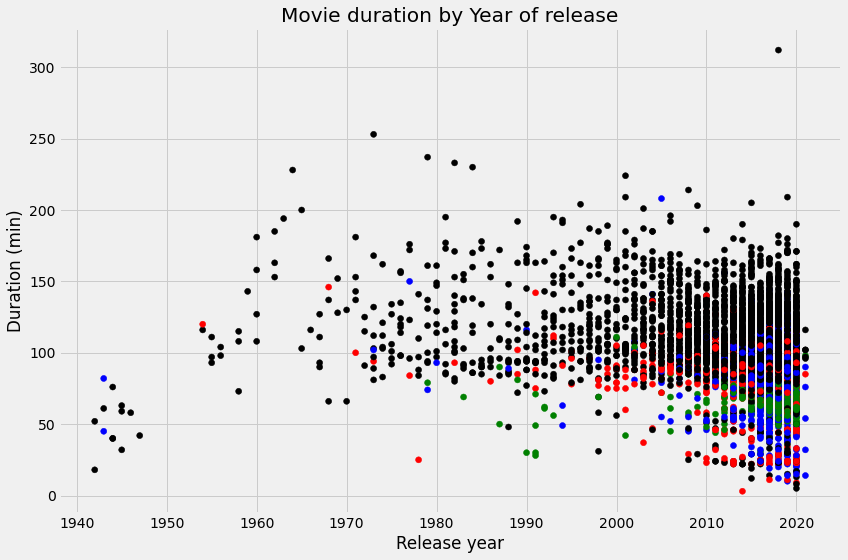

In [ ]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))
x=netflix_movies_col_subset['release_year']
y=netflix_movies_col_subset['duration']
plt.title("Movie duration by Year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.scatter(x,y,c=colors)
plt.show()

